In [1]:
### imports
import sys, os
from samcc_turbo.wrappers import run_dssp
from samcc_turbo.wrappers import run_socket
from samcc_turbo.socket_parser import parse_socket_output
from samcc_turbo.socketClass import socket_class
from samcc_turbo.bundleClass import bundleClass

In [2]:
# set path to DSSP and Socket binaries
bin_paths = {'dssp':'/opt/apps/dssp-2.2.1/mkdssp', 'socket':'~/apps/socket3.03/socket'} 


In [3]:
# Let's consider a bundle comprisign two segments separated by a pi-helix
pdb_file = './example_in/3tsi.pdb'

In [4]:
dssppath       = run_dssp(pdb_file, bin_paths['dssp'])
socketpath     = run_socket(pdb_file, dssppath, bin_paths['socket'])
socket_data    = parse_socket_output(socketpath)
s              = socket_class(socket_data, pdb_file)

os.remove(dssppath)
os.remove(socketpath)

bundles = s.get_bundles(res_num_layer_detection=5,
                        distance_threshold='auto',
                        search_layer_setting_num=9)

print(f'We found {len(bundles)} bundles!')

We found 2 bundles!


In [5]:
# Calculate basic parameters for each bundle

for bundle in bundles:
    bundle.calc_bundleaxis()
    bundle.get_helicesaxis()
    bundle.calc_periodicity()
    bundle.calc_radius()
    bundle.calc_crick()
    bundle.calc_axialshift()
    bundle.assign_positions()

In [6]:
# Calculate Crick angle deviation (helix axial rotation for each bundle)

# The first bundle has canonical periodicity of 7/2
print(bundles[0].gendf().P.mean())
bundles[0].calc_crickdev(7./2., 7, optimal_ph1=19.5)

# The second bundle has non-canonical periodicity of 11/3
print(bundles[1].gendf().P.mean())
bundles[1].calc_crickdev(11./3., 11, optimal_ph1=19.5)

# "data missing" warnings are due to the fact that
# Crick angle deviation (crdev) and (positions_samcc) 
# weren't yet calculated when gendf method was called


3.5281170641418917
3.6542065871324594


/home/nfs/sdunin/scr/samcc_turbo/samcc_turbo/bundleClass.py:155: UserWarning: crdev data missing
  warnings.warn("%s data missing" % c)
/home/nfs/sdunin/scr/samcc_turbo/samcc_turbo/bundleClass.py:155: UserWarning: positions_samcc data missing
  warnings.warn("%s data missing" % c)


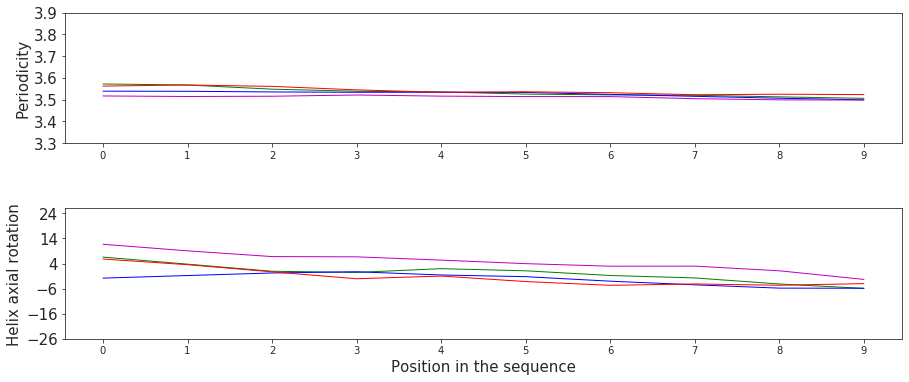

In [7]:
bundles[0].plot('./example_out/3tsi_0.png', elements=['Periodicity','CrickDev'])

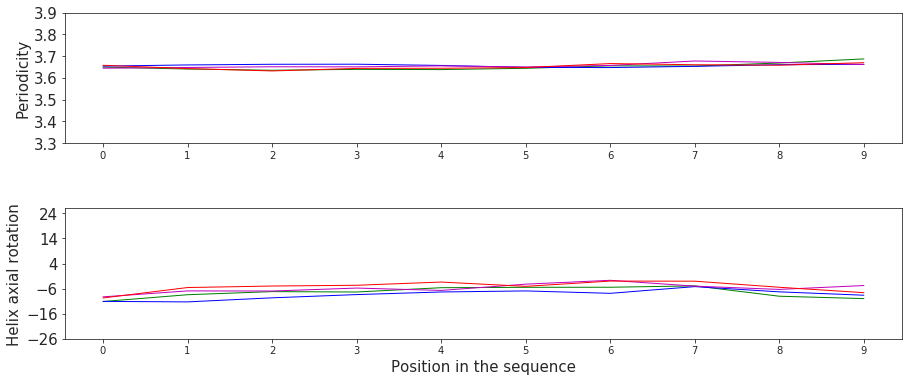

In [8]:
bundles[1].plot('./example_out/3tsi_1.png', elements=['Periodicity', 'CrickDev'])

In [9]:
# Raw measurements for bundle #1
bundles[0].gendf()

P  chain_ap chain_name      crdev       crick         p  \
layer chain                                                                   
0     0           NaN     False          A        NaN         NaN       NaN   
      1           NaN     False          B        NaN         NaN       NaN   
      2           NaN     False          C        NaN         NaN       NaN   
      3           NaN     False          D        NaN         NaN       NaN   
1     0      3.571958     False          A   6.563391   77.491963  3.654319   
      1      3.538782     False          B  -1.815647   69.112925  3.551030   
      2      3.516832     False          C  11.680151   82.608722  3.726579   
      3      3.562139     False          D   5.798770   76.727342  3.645644   
2     0      3.567233     False          A   3.754452  177.540167  3.684627   
      1      3.538318     False          B  -0.785112  173.000602  3.566128   
      2      3.514318     False          C   9.059993 -177.154293  3.678419   
      3      3.567301     False          D   3.537362  177.323077  3.668617   
3     0      3.548049     False          A   0.922004  -82.435139  3.640959   
      1      3.535288     False          B   0.239382  -83.117761  3.583972   
      2      3.515569     False          C   6.771408  -76.585735  3.628983   
      3      3.560884     False          D   0.676631  -82.680512  3.673169   
4     0      3.538554     False          A   0.446942   19.946942  3.552879   
      1      3.533707     False          B   0.725331   20.225331  3.612964   
      2      3.521251     False          C   6.669156   26.169156  3.637430   
      3      3.544873     False          D  -2.064976   17.435024  3.602100   
5     0      3.535228     False          A   1.954217  124.311360  3.585816   
      1      3.534190     False          B  -0.565701  121.791442  3.616998   
      2      3.515992     False          C   5.357606  127.714749  3.672585   
      3      3.533471     False          D  -0.987741  121.369402  3.597415   
6     0      3.525327     False          A   1.103822 -133.681893  3.650477   
      1      3.532816     False          B  -1.233964 -136.019678  3.643931   
      2      3.513986     False          C   3.953161 -130.832554  3.671667   
      3      3.536031     False          D  -3.185741 -137.971455  3.656200   
7     0      3.521887     False          A  -0.773271  -32.701842  3.653144   
      1      3.524167     False          B  -3.035232  -34.963804  3.677469   
      2      3.513896     False          C   2.938910  -28.989661  3.645082   
      3      3.531873     False          D  -4.681524  -36.610096  3.631741   
8     0      3.519830     False          A  -1.738784   69.189788  3.657403   
      1      3.515143     False          B  -4.483126   66.445446  3.654407   
      2      3.504348     False          C   2.959771   73.888342  3.653197   
      3      3.522417     False          D  -4.143200   66.785372  3.598894   
9     0      3.512679     False          A  -4.157379  169.628335  3.689754   
      1      3.506439     False          B  -5.801578  167.984136  3.663948   
      2      3.498985     False          C   1.104742  174.890456  3.707753   
      3      3.524853     False          D  -4.657160  169.128554  3.625069   
10    0      3.505912     False          A  -5.902436  -89.259579  3.706534   
      1      3.499052     False          B  -5.851928  -89.209071  3.679608   
      2      3.497931     False          C  -2.326461  -85.683603  3.753702   
      3      3.523177     False          D  -4.009947  -87.367090  3.649385   
11    0           NaN     False          A        NaN         NaN       NaN   
      1           NaN     False          B        NaN         NaN       NaN   
      2           NaN     False          C        NaN         NaN       NaN   
      3           NaN     False          D        NaN         NaN       NaN   

            positions_samcc positions_twister    radius res_name  res

In [10]:
# Now, let's measure this structure manually and treat the two bundles as a single one

defdata = [[range(61, 95), range(61, 95), range(61, 95), range(61, 95)],
           ['A', 'B', 'C', 'D'],
           [False, False, False, False],
           ['x', 'x', 'x', 'x']]

bundle = bundleClass()
bundle.from_defdata(pdb_file, *defdata)

bundle.calc_bundleaxis()
bundle.get_helicesaxis()
bundle.calc_periodicity()
bundle.calc_radius()
bundle.calc_crick()

bundle.calc_axialshift()
bundle.assign_positions()


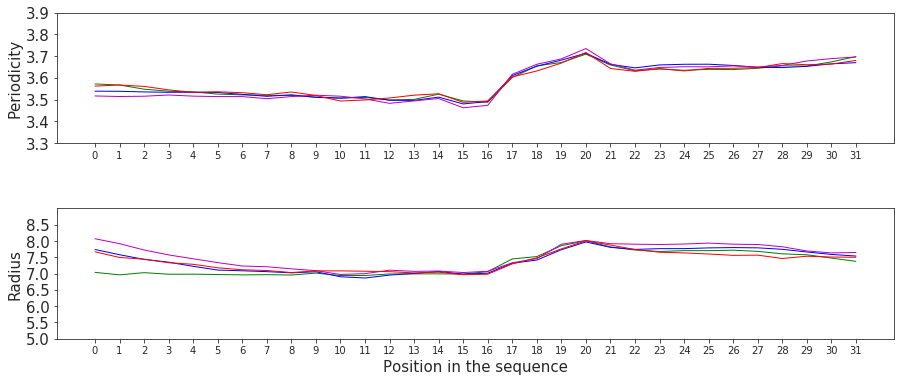

In [11]:
# A clear 7/2 --> 11/3 trainsition is visible

bundle.plot('./example_out/3tsi_manual.png', elements=['Periodicity', 'Radius'])

#### Problems? Questions?

Do not hesitate to contact us!